Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [2]:
df = pd.read_csv("Ecom_CRM_analysis.csv",encoding="ISO-8859-1")

In [3]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Checking Null Values

In [4]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Only Description and CustomerID has null values

In [5]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


There are 5268 rows which are duplicate and we need to drop those entries

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [8]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

checking Datatypes of all columns Quantity, Unit Price and CustomerID are in number and rest are objects

In [9]:
df['CustomerID'].nunique()

4372

Total 4372 Unique Customers are present in this dataset

In [10]:
df['InvoiceNo'].nunique()

25900

Total 25900 orders entries are present in the dataset

converting Invoice date into datetime format

In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 536641, dtype: datetime64[ns]

creating a Dataset of all CustomerID with unique Invoice No and taking only first pair

In [13]:
custid = df.groupby('InvoiceNo',as_index=False).agg({"CustomerID":'first'}).reset_index()

In [14]:
custid

,index,InvoiceNo,CustomerID
0,0,536365,17850.0
1,1,536366,17850.0
2,2,536367,13047.0
3,3,536368,13047.0
4,4,536369,13047.0
...,...,...,...
25895,25895,C581484,16446.0
25896,25896,C581490,14397.0
25897,25897,C581499,15498.0
25898,25898,C581568,15311.0


Checking if same time more than one order has placed

In [15]:
df.groupby('InvoiceDate')['InvoiceNo'].nunique().sort_values(ascending=False)

InvoiceDate
2011-05-10 15:05:00    6
2011-05-10 15:07:00    5
2011-04-08 15:06:00    5
2011-01-28 14:52:00    5
2011-01-28 14:53:00    5
                      ..
2011-05-06 15:16:00    1
2011-05-06 15:15:00    1
2011-05-06 15:13:00    1
2011-05-06 15:11:00    1
2011-12-09 12:50:00    1
Name: InvoiceNo, Length: 23260, dtype: int64

Here we can see that we can not fill null CustomerID with other customerID who has ordered on same time because there are so many time more than one order placed at a time, hence filling null Value of CustomerID with UnknownCustomer

In [16]:
custid['CustomerID']=custid['CustomerID'].fillna("UnknownCustomer")

In [17]:
df_new = df.merge(custid,left_on = 'InvoiceNo',right_on = 'InvoiceNo',how='left')

In [18]:
df_new.isna().sum()

InvoiceNo            0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID_x    135037
Country              0
index                0
CustomerID_y         0
dtype: int64

creating a Dataset of all Description with unique Stock ID and taking only first pair

In [19]:
desc_name = df.groupby('StockCode',as_index=False).agg({"Description":'first'}).reset_index()

filling UnknownProduct to rest of the null Description

In [20]:
desc_name['Description']=desc_name['Description'].fillna("UnknownProduct")

In [21]:
df_new = df_new.merge(desc_name,left_on='StockCode',right_on='StockCode',how='left')

In [22]:
df_new.isna().sum()

InvoiceNo             0
StockCode             0
Description_x      1454
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID_x     135037
Country               0
index_x               0
CustomerID_y          0
index_y               0
Description_y         0
dtype: int64

In [23]:
df_new = df_new.drop(['Description_x','CustomerID_x','index_x','index_y'],axis=1)

In [24]:
df_new

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,CustomerID_y,Description_y
0,536365,85123A,6,2010-12-01 08:26:00,2.55,United Kingdom,17850.0,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,71053,6,2010-12-01 08:26:00,3.39,United Kingdom,17850.0,WHITE METAL LANTERN
2,536365,84406B,8,2010-12-01 08:26:00,2.75,United Kingdom,17850.0,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,6,2010-12-01 08:26:00,3.39,United Kingdom,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,6,2010-12-01 08:26:00,3.39,United Kingdom,17850.0,RED WOOLLY HOTTIE WHITE HEART.
...,...,...,...,...,...,...,...,...
536636,581587,22613,12,2011-12-09 12:50:00,0.85,France,12680.0,PACK OF 20 SPACEBOY NAPKINS
536637,581587,22899,6,2011-12-09 12:50:00,2.10,France,12680.0,CHILDREN'S APRON DOLLY GIRL
536638,581587,23254,4,2011-12-09 12:50:00,4.15,France,12680.0,CHILDRENS CUTLERY DOLLY GIRL
536639,581587,23255,4,2011-12-09 12:50:00,4.15,France,12680.0,CHILDRENS CUTLERY CIRCUS PARADE


In [25]:
df_new.isna().sum()

InvoiceNo        0
StockCode        0
Quantity         0
InvoiceDate      0
UnitPrice        0
Country          0
CustomerID_y     0
Description_y    0
dtype: int64

In [26]:
df_new.rename(columns={'CustomerID_y':'CustomerID','Description_y':'Description'},inplace=True)

Basic Analysis on Dataset

In [27]:
df_new['Amount'] = df_new['Quantity']*df_new['UnitPrice']

Top 10 High Gross Value Customers

In [28]:
df_new.groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(11)

CustomerID
UnknownCustomer    1447487.53
14646.0             279489.02
18102.0             256438.49
17450.0             187322.17
14911.0             132458.73
12415.0             123725.45
14156.0             113214.59
17511.0              88125.38
16684.0              65892.08
13694.0              62690.54
15311.0              59284.19
Name: Amount, dtype: float64

Customer having CustomerID 14646 has purchased of heighest amount of 2,79,489

top 10 demanding products

In [29]:
df_new.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

Description
SMALL POPCORN HOLDER                  56427
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47260
mailout                               44024
WHITE HANGING HEART T-LIGHT HOLDER    39103
ASSORTED COLOUR BIRD ORNAMENT         36122
PACK OF 72 RETROSPOT CAKE CASES       36016
RABBIT NIGHT LIGHT                    30597
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26299
Name: Quantity, dtype: int64

most sold product was Small Popcorn Holder

Fetching day, month, year and week day from invoice date

In [30]:
df_new['day'],df_new['month'],df_new['year'],df_new['Week_day'] = df_new['InvoiceDate'].dt.day,df_new['InvoiceDate'].dt.month, df_new['InvoiceDate'].dt.year,df_new['InvoiceDate'].dt.day_name() 

In [31]:
df_new

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,CustomerID,Description,Amount,day,month,year,Week_day
0,536365,85123A,6,2010-12-01 08:26:00,2.55,United Kingdom,17850.0,WHITE HANGING HEART T-LIGHT HOLDER,15.30,1,12,2010,Wednesday
1,536365,71053,6,2010-12-01 08:26:00,3.39,United Kingdom,17850.0,WHITE METAL LANTERN,20.34,1,12,2010,Wednesday
2,536365,84406B,8,2010-12-01 08:26:00,2.75,United Kingdom,17850.0,CREAM CUPID HEARTS COAT HANGER,22.00,1,12,2010,Wednesday
3,536365,84029G,6,2010-12-01 08:26:00,3.39,United Kingdom,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE,20.34,1,12,2010,Wednesday
4,536365,84029E,6,2010-12-01 08:26:00,3.39,United Kingdom,17850.0,RED WOOLLY HOTTIE WHITE HEART.,20.34,1,12,2010,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536636,581587,22613,12,2011-12-09 12:50:00,0.85,France,12680.0,PACK OF 20 SPACEBOY NAPKINS,10.20,9,12,2011,Friday
536637,581587,22899,6,2011-12-09 12:50:00,2.10,France,12680.0,CHILDREN'S APRON DOLLY GIRL,12.60,9,12,2011,Friday
536638,581587,23254,4,2011-12-09 12:50:00,4.15,France,12680.0,CHILDRENS CUTLERY DOLLY GIRL,16.60,9,12,2011,Friday
536639,581587,23255,4,2011-12-09 12:50:00,4.15,France,12680.0,CHILDRENS CUTLERY CIRCUS PARADE,16.60,9,12,2011,Friday


<AxesSubplot:xlabel='day'>

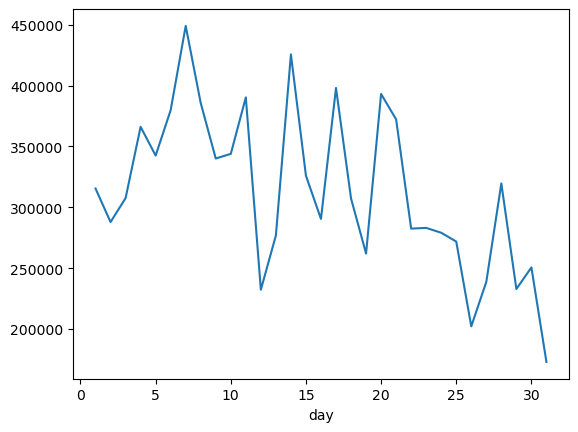

In [32]:
df_new.groupby('day')['Amount'].sum().plot()

we can see mostly spent was from starting of the second week and it slowly declines with the day passes

<AxesSubplot:xlabel='Week_day'>

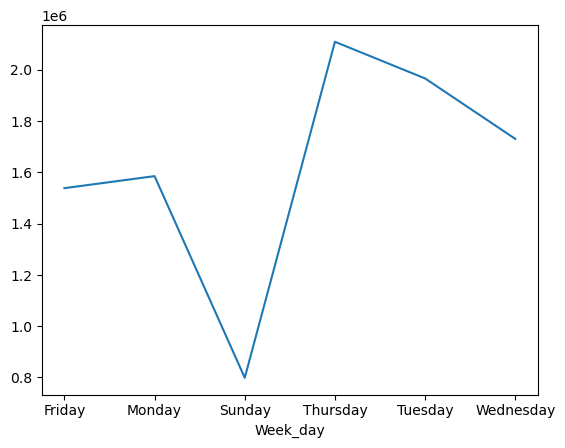

In [33]:
df_new.groupby('Week_day')['Amount'].sum().plot()

Mostly spent day was Thursday and there is no order on Saturday

<AxesSubplot:xlabel='year,month'>

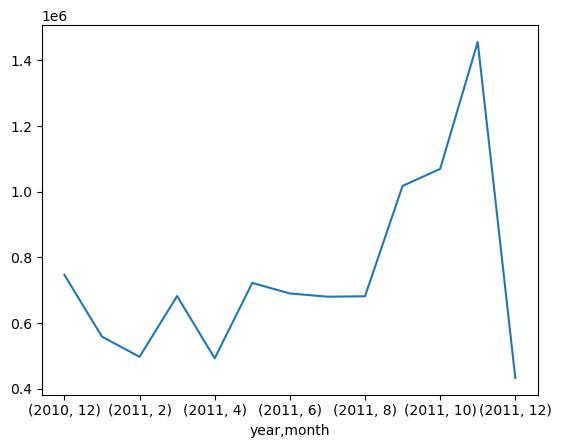

In [34]:
df_new.groupby(["year","month"])['Amount'].sum().plot()

A Sharp rise in sale from September and maximum sale in the month of November

In [35]:
x=(df_new.groupby('month')['Amount'].sum()/df_new.groupby('month')['InvoiceNo'].nunique()).reset_index()

Commulative Average amount per order in each month

In [36]:
x

,month,0
0,1,378.352683
1,2,356.802879
2,3,343.930398
3,4,282.321010
4,5,333.993571
5,6,342.931029
6,7,352.961594
7,8,392.277755
8,9,437.299820
9,10,405.524547


D:\program\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='0'>

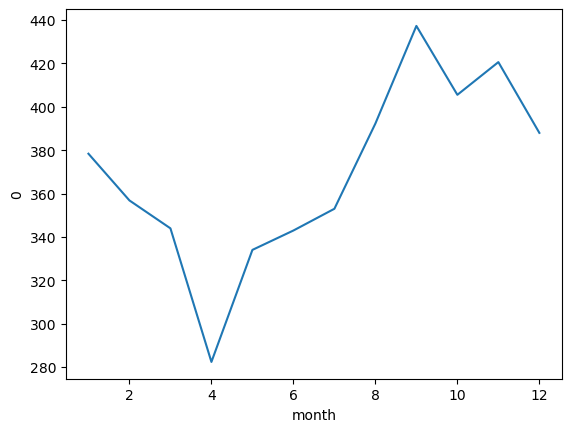

In [37]:
sns.lineplot(x['month'],x[0])

In september Average order amount is heighest and in April it is lowest

In [38]:
def retu(a):
    if a<0:
        return "Return"
    else: 
        return "Deliever"

In [39]:
df_new['Status'] = df_new['Quantity'].apply(retu)

In [40]:
df_new['Status'].value_counts()

Deliever    526054
Return       10587
Name: Status, dtype: int64

Out of 526054 orders 10587 were returned

In [41]:
df_new[df_new['UnitPrice']<0] 

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,CustomerID,Description,Amount,day,month,year,Week_day,Status
297646,A563186,B,1,2011-08-12 14:51:00,-11062.06,United Kingdom,UnknownCustomer,Adjust bad debt,-11062.06,12,8,2011,Friday,Deliever
297647,A563187,B,1,2011-08-12 14:52:00,-11062.06,United Kingdom,UnknownCustomer,Adjust bad debt,-11062.06,12,8,2011,Friday,Deliever


There are two rows which has unitprice in negative with description adjust bad debt. Kind of paying for Debt

In [42]:
df_new.describe()

,Quantity,UnitPrice,Amount,day,month,year
count,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,18.123861,15.024640,7.544820,2010.921771
std,219.130156,97.233118,380.656263,8.663351,3.508696,0.268532
min,-80995.000000,-11062.060000,-168469.600000,1.000000,1.000000,2010.000000
25%,1.000000,1.250000,3.750000,7.000000,5.000000,2011.000000
50%,3.000000,2.080000,9.870000,15.000000,8.000000,2011.000000
75%,10.000000,4.130000,17.400000,22.000000,11.000000,2011.000000
max,80995.000000,38970.000000,168469.600000,31.000000,12.000000,2011.000000


Describe function gives the brief idea of Numerical Columns, as we can see here Quantity [-80995,80995] with the mean of 9.62

In [43]:
df_new[df_new['Quantity'].abs() == 80995]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,CustomerID,Description,Amount,day,month,year,Week_day,Status
535160,581483,23843,80995,2011-12-09 09:15:00,2.08,United Kingdom,16446.0,"PAPER CRAFT , LITTLE BIRDIE",168469.6,9,12,2011,Friday,Deliever
535161,C581484,23843,-80995,2011-12-09 09:27:00,2.08,United Kingdom,16446.0,"PAPER CRAFT , LITTLE BIRDIE",-168469.6,9,12,2011,Friday,Return


Here we can see that 80995 quantity was ordered mistakenly, ordered cancelled after few minutes

In [44]:
df_new[df_new['Status']=='Return']

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,CustomerID,Description,Amount,day,month,year,Week_day,Status
141,C536379,D,-1,2010-12-01 09:41:00,27.50,United Kingdom,14527.0,Discount,-27.50,1,12,2010,Wednesday,Return
154,C536383,35004C,-1,2010-12-01 09:49:00,4.65,United Kingdom,15311.0,SET OF 3 COLOURED FLYING DUCKS,-4.65,1,12,2010,Wednesday,Return
235,C536391,22556,-12,2010-12-01 10:24:00,1.65,United Kingdom,17548.0,PLASTERS IN TIN CIRCUS PARADE,-19.80,1,12,2010,Wednesday,Return
236,C536391,21984,-24,2010-12-01 10:24:00,0.29,United Kingdom,17548.0,PACK OF 12 PINK PAISLEY TISSUES,-6.96,1,12,2010,Wednesday,Return
237,C536391,21983,-24,2010-12-01 10:24:00,0.29,United Kingdom,17548.0,PACK OF 12 BLUE PAISLEY TISSUES,-6.96,1,12,2010,Wednesday,Return
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535188,C581490,23144,-11,2011-12-09 09:57:00,0.83,United Kingdom,14397.0,ZINC T-LIGHT HOLDER STARS SMALL,-9.13,9,12,2011,Friday,Return
536280,C581499,M,-1,2011-12-09 10:28:00,224.69,United Kingdom,15498.0,Manual,-224.69,9,12,2011,Friday,Return
536447,C581568,21258,-5,2011-12-09 11:57:00,10.95,United Kingdom,15311.0,VICTORIAN SEWING BOX LARGE,-54.75,9,12,2011,Friday,Return
536448,C581569,84978,-1,2011-12-09 11:58:00,1.25,United Kingdom,17315.0,HANGING HEART JAR T-LIGHT HOLDER,-1.25,9,12,2011,Friday,Return


In [45]:
aov = (df_new['Amount'].sum())/(df_new['InvoiceNo'].nunique())

In [46]:
aov

375.52150401544395

Average Order Value is 375.52

In [47]:
df_new['Amount'].sum(),df_new['InvoiceNo'].nunique()

(9726006.953999998, 25900)

In [48]:
df_new.groupby('InvoiceNo')['Amount'].sum().sort_values(ascending=False)

InvoiceNo
581483     168469.60
541431      77183.60
574941      52940.94
576365      50653.91
556444      38970.00
             ...    
C580605    -17836.46
C550456    -22998.40
C556445    -38970.00
C541433    -77183.60
C581484   -168469.60
Name: Amount, Length: 25900, dtype: float64

In [49]:
df_new['Hour'] = df_new['InvoiceDate'].dt.hour

In [50]:
df_hourly_invoice = df_new.groupby('Hour')['InvoiceNo'].nunique().reset_index()

In [51]:
df_hourly_invoice

,Hour,InvoiceNo
0,6,22
1,7,31
2,8,624
3,9,1824
4,10,2961
5,11,3165
6,12,3962
7,13,3369
8,14,3137
9,15,3069


<AxesSubplot:xlabel='Hour', ylabel='InvoiceNo'>

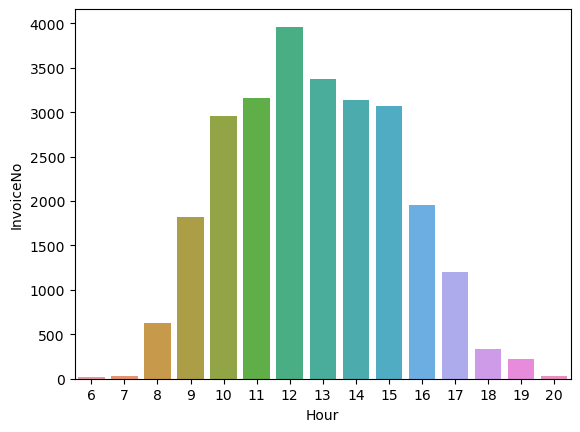

In [52]:
sns.barplot(data=df_hourly_invoice,x='Hour',y='InvoiceNo')

Mostly order were placed in afternoon

#Calculating RFM points for each customers

In [53]:
from datetime import timedelta
df_new = df_new[df_new['Status'] == 'Deliever']
base_day = df_new['InvoiceDate'].min()- timedelta(days=1)

In [54]:
df_new['InvoiceDate1'] = df_new['InvoiceDate']

C:\Users\chang\AppData\Local\Temp\ipykernel_7632\937562198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['InvoiceDate1'] = df_new['InvoiceDate']


In [55]:
cust_seg = df_new.groupby('CustomerID').agg({'Amount':'sum', 
                         'InvoiceDate':lambda x:x.max()-base_day, 
                         'InvoiceDate1': lambda x:x.max()-x.min()+timedelta(days=1), 
                         'InvoiceNo':'nunique'})

In [56]:
cust_seg['InvoiceDate'] = cust_seg['InvoiceDate'].dt.days

In [57]:
cust_seg['InvoiceDate1'] = cust_seg['InvoiceDate1'].dt.days

In [58]:
cust_seg['Avg_order_per_week'] = cust_seg['InvoiceNo']*7/cust_seg['InvoiceDate1']

In [59]:
cust_seg = cust_seg.drop(columns={'InvoiceDate1','InvoiceNo'})

In [60]:
cust_seg

,Amount,InvoiceDate,Avg_order_per_week
CustomerID,,,
12346.0,77183.60,49,7.000000
12347.0,4310.00,372,0.133880
12348.0,1797.24,299,0.098940
12349.0,1757.55,356,7.000000
12350.0,334.40,64,7.000000
...,...,...,...
18281.0,80.82,194,7.000000
18282.0,178.05,367,0.117647
18283.0,2045.53,371,0.335329


In [61]:
cust_seg['monetary']=pd.qcut(cust_seg['Amount'],[0,0.2,0.4,0.6,0.8,1],labels=False)

In [62]:
cust_seg['monetary']=cust_seg['monetary']+1

In [63]:
cust_seg['recency']=pd.qcut(cust_seg['InvoiceDate'],[0,0.2,0.4,0.6,0.8,1],labels=False,duplicates='drop')

In [64]:
cust_seg['recency']=cust_seg['recency']+1

In [65]:
cust_seg['recency']

CustomerID
12346.0            1
12347.0            5
12348.0            2
12349.0            4
12350.0            1
                  ..
18281.0            1
18282.0            5
18283.0            5
18287.0            3
UnknownCustomer    5
Name: recency, Length: 4340, dtype: int64

In [66]:
cust_seg['frequency']=pd.qcut(cust_seg['Avg_order_per_week'],[0,0.2,0.4,0.6,0.8,1],labels=False,duplicates='drop')

In [67]:
cust_seg['frequency']= cust_seg['frequency']+1

In [68]:
cust_seg

,Amount,InvoiceDate,Avg_order_per_week,monetary,recency,frequency
CustomerID,,,,,,
12346.0,77183.60,49,7.000000,5,1,4
12347.0,4310.00,372,0.133880,5,5,2
12348.0,1797.24,299,0.098940,4,2,1
12349.0,1757.55,356,7.000000,4,4,4
12350.0,334.40,64,7.000000,2,1,4
...,...,...,...,...,...,...
18281.0,80.82,194,7.000000,1,1,4
18282.0,178.05,367,0.117647,1,5,1
18283.0,2045.53,371,0.335329,4,5,3


In [69]:
cust_seg = cust_seg.drop(['Amount','InvoiceDate','Avg_order_per_week'],axis=1)

In [70]:
cust_seg['fm'] = round((cust_seg['frequency']+cust_seg['monetary'])/2)

In [71]:
cust_seg

,monetary,recency,frequency,fm
CustomerID,,,,
12346.0,5,1,4,4.0
12347.0,5,5,2,4.0
12348.0,4,2,1,2.0
12349.0,4,4,4,4.0
12350.0,2,1,4,3.0
...,...,...,...,...
18281.0,1,1,4,2.0
18282.0,1,5,1,1.0
18283.0,4,5,3,4.0


In [72]:
def segment(a,b):
    if a==5:
        if b>=4:
            return 'Champion'
        elif b>=2:
            return 'Potential Loyalist'
        else:
            return 'New Customers'
    elif a==4:
        if b>=4:
            return 'Loyal Customer'
        elif b>=2:
            return 'Potential Loyalist'
        else:
            return 'Promising'
    elif a==3:
        if b>=4:
            return 'Loyal Customer'
        elif b==3:
            return 'Need Attention'
        else:
            return 'About To Sleep'
    elif a>1:
        if b==5:
            return '''Can't loose them'''
        elif b>=3:
            return 'At Risk'
        else:
            return 'Hibernating'
    else:
        if b==5:
            return '''Can't loose them'''
        elif b>=3:
            return 'At Risk'
        elif b>=2:
            return 'Hibernating'
        else:
            return 'Lost'

In [73]:
cust_seg['segment'] = cust_seg.apply(lambda x:segment(x.recency,x.fm),axis=1)

In [74]:
cust_seg

,monetary,recency,frequency,fm,segment
CustomerID,,,,,
12346.0,5,1,4,4.0,At Risk
12347.0,5,5,2,4.0,Champion
12348.0,4,2,1,2.0,Hibernating
12349.0,4,4,4,4.0,Loyal Customer
12350.0,2,1,4,3.0,At Risk
...,...,...,...,...,...
18281.0,1,1,4,2.0,Hibernating
18282.0,1,5,1,1.0,New Customers
18283.0,4,5,3,4.0,Champion


In [75]:
cust_seg_tree = cust_seg['segment'].value_counts().reset_index()

In [76]:
cust_seg_tree

,index,segment
0,Potential Loyalist,953
1,Hibernating,888
2,At Risk,864
3,Loyal Customer,510
4,Champion,464
5,About To Sleep,406
6,Need Attention,229
7,Promising,11
8,New Customers,9
9,Can't loose them,3


In [77]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [78]:
import squarify

Text(0.5, 1.0, 'Customers Segmentation')

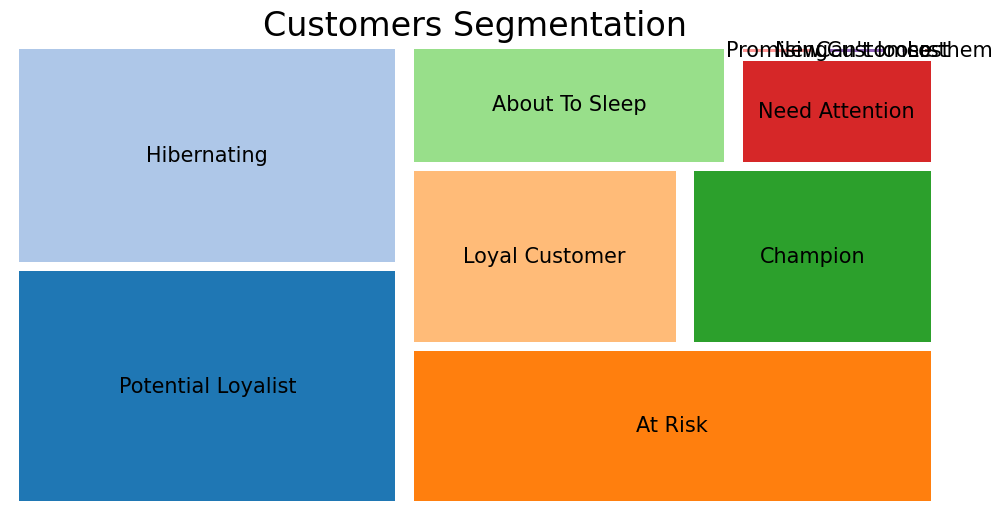

In [79]:
plt.figure(figsize=(12, 6)) 
# we don't require the axis values so lets remove it 
plt.axis("off") 
axis = squarify.plot(cust_seg_tree['segment'], 
                     label=cust_seg_tree['index'], 
                     color=sns.color_palette("tab20", len( 
                         cust_seg_tree['segment'])), 
                     pad=1, 
                     text_kwargs={'fontsize': 15}) 
axis.set_title("Customers Segmentation", fontsize=24) 

In [80]:
from PIL import Image

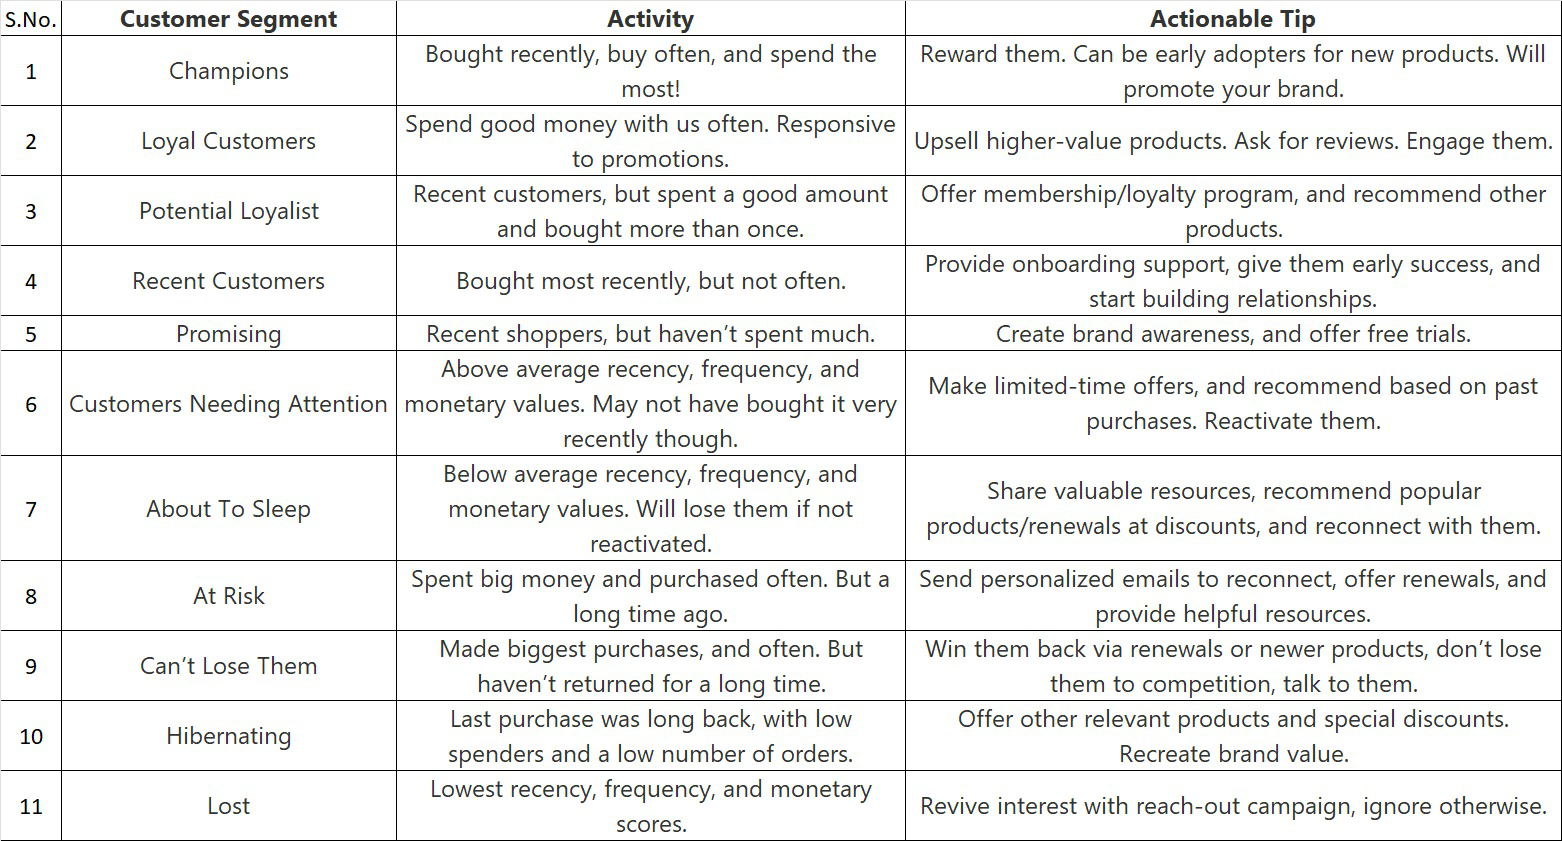

In [81]:
Image.open('rfm.jpeg')